## Pandas Practicals

In [ ]:

# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:

# ---------------------------
# 2. Create Sample Dataset
# ---------------------------
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Ian', 'Jack'],
    'Department': ['HR', 'IT', 'IT', 'Finance', 'HR', 'Finance', 'IT', 'HR', 'Finance', 'IT'],
    'Salary': [50000, 60000, np.nan, 75000, 52000, 72000, 61000, np.nan, 68000, 59000],
    'JoiningDate': ['2020-01-15', '2019-03-10', '2021-07-20', '2018-11-25', '2020-05-30',
                    '2019-12-12', '2021-01-01', '2020-09-10', '2018-06-18', '2021-03-03']
}
df = pd.DataFrame(data)
# Convert JoiningDate to datetime
df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])

In [4]:
# Display the dataset
print("Sample Dataset:\n", df)

Sample Dataset:
    ID     Name Department   Salary JoiningDate
0   1    Alice         HR  50000.0  2020-01-15
1   2      Bob         IT  60000.0  2019-03-10
2   3  Charlie         IT      NaN  2021-07-20
3   4    David    Finance  75000.0  2018-11-25
4   5      Eva         HR  52000.0  2020-05-30
5   6    Frank    Finance  72000.0  2019-12-12
6   7    Grace         IT  61000.0  2021-01-01
7   8    Helen         HR      NaN  2020-09-10
8   9      Ian    Finance  68000.0  2018-06-18
9  10     Jack         IT  59000.0  2021-03-03


In [ ]:
# 3. Inspect the Dataset
print("\nDataset Info:")
print(df.info())

print("####################################################")
print("\nStatistical Summary:")
print(df.describe())
print("####################################################")
print("\nFirst 5 rows:")
print(df.head())
print("####################################################")
print("\nLast 5 rows:")
print(df.tail())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           10 non-null     int64         
 1   Name         10 non-null     object        
 2   Department   10 non-null     object        
 3   Salary       8 non-null      float64       
 4   JoiningDate  10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 532.0+ bytes
None
####################################################

Statistical Summary:
             ID        Salary          JoiningDate
count  10.00000      8.000000                   10
mean    5.50000  62125.000000  2020-02-19 12:00:00
min     1.00000  50000.000000  2018-06-18 00:00:00
25%     3.25000  57250.000000  2019-05-18 06:00:00
50%     5.50000  60500.000000  2020-03-23 00:00:00
75%     7.75000  69000.000000  2020-12-03 18:00:00
max    10.00000  7

In [8]:
# ---------------------------
# 4. Handling Missing Data
# ---------------------------
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
ID             0
Name           0
Department     0
Salary         2
JoiningDate    0
dtype: int64


In [10]:
# Fill missing Salary with mean
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
print("\nAfter filling missing Salary with mean:")
print(df)


After filling missing Salary with mean:
   ID     Name Department   Salary JoiningDate
0   1    Alice         HR  50000.0  2020-01-15
1   2      Bob         IT  60000.0  2019-03-10
2   3  Charlie         IT  62125.0  2021-07-20
3   4    David    Finance  75000.0  2018-11-25
4   5      Eva         HR  52000.0  2020-05-30
5   6    Frank    Finance  72000.0  2019-12-12
6   7    Grace         IT  61000.0  2021-01-01
7   8    Helen         HR  62125.0  2020-09-10
8   9      Ian    Finance  68000.0  2018-06-18
9  10     Jack         IT  59000.0  2021-03-03


In [11]:
# 5. Selecting Data
print("\n--- Select Column 'Name' ---")
print(df['Name'])

print("\n--- Select Multiple Columns ---")
print(df[['Name', 'Salary']])

print("\n--- Select Rows with Salary > 60000 ---")
print(df[df['Salary'] > 60000])


--- Select Column 'Name' ---
0      Alice
1        Bob
2    Charlie
3      David
4        Eva
5      Frank
6      Grace
7      Helen
8        Ian
9       Jack
Name: Name, dtype: object

--- Select Multiple Columns ---
      Name   Salary
0    Alice  50000.0
1      Bob  60000.0
2  Charlie  62125.0
3    David  75000.0
4      Eva  52000.0
5    Frank  72000.0
6    Grace  61000.0
7    Helen  62125.0
8      Ian  68000.0
9     Jack  59000.0

--- Select Rows with Salary > 60000 ---
   ID     Name Department   Salary JoiningDate
2   3  Charlie         IT  62125.0  2021-07-20
3   4    David    Finance  75000.0  2018-11-25
5   6    Frank    Finance  72000.0  2019-12-12
6   7    Grace         IT  61000.0  2021-01-01
7   8    Helen         HR  62125.0  2020-09-10
8   9      Ian    Finance  68000.0  2018-06-18


In [12]:
# 6. Adding and Modifying Columns
df['Bonus'] = df['Salary'] * 0.1
df['TotalCompensation'] = df['Salary'] + df['Bonus']
print("\nAfter adding Bonus and TotalCompensation columns:")
print(df)


After adding Bonus and TotalCompensation columns:
   ID     Name Department   Salary JoiningDate   Bonus  TotalCompensation
0   1    Alice         HR  50000.0  2020-01-15  5000.0            55000.0
1   2      Bob         IT  60000.0  2019-03-10  6000.0            66000.0
2   3  Charlie         IT  62125.0  2021-07-20  6212.5            68337.5
3   4    David    Finance  75000.0  2018-11-25  7500.0            82500.0
4   5      Eva         HR  52000.0  2020-05-30  5200.0            57200.0
5   6    Frank    Finance  72000.0  2019-12-12  7200.0            79200.0
6   7    Grace         IT  61000.0  2021-01-01  6100.0            67100.0
7   8    Helen         HR  62125.0  2020-09-10  6212.5            68337.5
8   9      Ian    Finance  68000.0  2018-06-18  6800.0            74800.0
9  10     Jack         IT  59000.0  2021-03-03  5900.0            64900.0


In [13]:
# 7. Sorting
df_sorted = df.sort_values(by='Salary', ascending=False)
print("\nSorted by Salary (Descending):")
print(df_sorted)


Sorted by Salary (Descending):
   ID     Name Department   Salary JoiningDate   Bonus  TotalCompensation
3   4    David    Finance  75000.0  2018-11-25  7500.0            82500.0
5   6    Frank    Finance  72000.0  2019-12-12  7200.0            79200.0
8   9      Ian    Finance  68000.0  2018-06-18  6800.0            74800.0
2   3  Charlie         IT  62125.0  2021-07-20  6212.5            68337.5
7   8    Helen         HR  62125.0  2020-09-10  6212.5            68337.5
6   7    Grace         IT  61000.0  2021-01-01  6100.0            67100.0
1   2      Bob         IT  60000.0  2019-03-10  6000.0            66000.0
9  10     Jack         IT  59000.0  2021-03-03  5900.0            64900.0
4   5      Eva         HR  52000.0  2020-05-30  5200.0            57200.0
0   1    Alice         HR  50000.0  2020-01-15  5000.0            55000.0


In [15]:
# 8. Grouping and Aggregation
grouped = df.groupby('Department')['Salary'].mean()
print("\n--- Average Salary by Department ---")
print(grouped)

print(df.groupby('Department').agg({'Salary': 'mean', 'Bonus': 'sum'}))


--- Average Salary by Department ---
Department
Finance    71666.666667
HR         54708.333333
IT         60531.250000
Name: Salary, dtype: float64
                  Salary    Bonus
Department                       
Finance     71666.666667  21500.0
HR          54708.333333  16412.5
IT          60531.250000  24212.5


In [16]:
# 9. Pivot Tables
pivot = df.pivot_table(values='Salary', index='Department', aggfunc='mean')
print("\n--- Pivot Table: Average Salary by Department ---")
print(pivot)


--- Pivot Table: Average Salary by Department ---
                  Salary
Department              
Finance     71666.666667
HR          54708.333333
IT          60531.250000


In [17]:
# 10. Working with Dates
df['Year'] = df['JoiningDate'].dt.year
df['Month'] = df['JoiningDate'].dt.month
print("\nAfter extracting Year and Month from JoiningDate:")
print(df[['Name', 'JoiningDate', 'Year', 'Month']])


After extracting Year and Month from JoiningDate:
      Name JoiningDate  Year  Month
0    Alice  2020-01-15  2020      1
1      Bob  2019-03-10  2019      3
2  Charlie  2021-07-20  2021      7
3    David  2018-11-25  2018     11
4      Eva  2020-05-30  2020      5
5    Frank  2019-12-12  2019     12
6    Grace  2021-01-01  2021      1
7    Helen  2020-09-10  2020      9
8      Ian  2018-06-18  2018      6
9     Jack  2021-03-03  2021      3


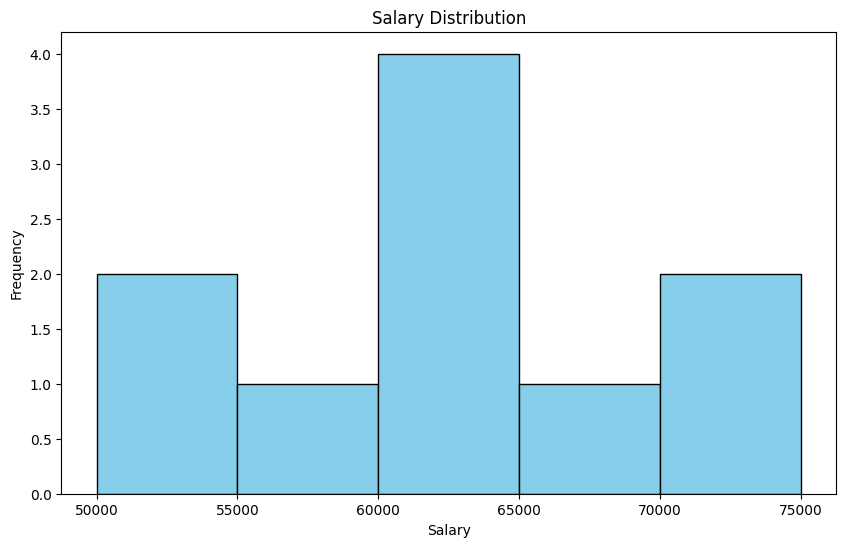

In [21]:
# 11. Visualization
# Salary Histogram
plt.figure(figsize=(10, 6))
df['Salary'].hist(bins=5, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

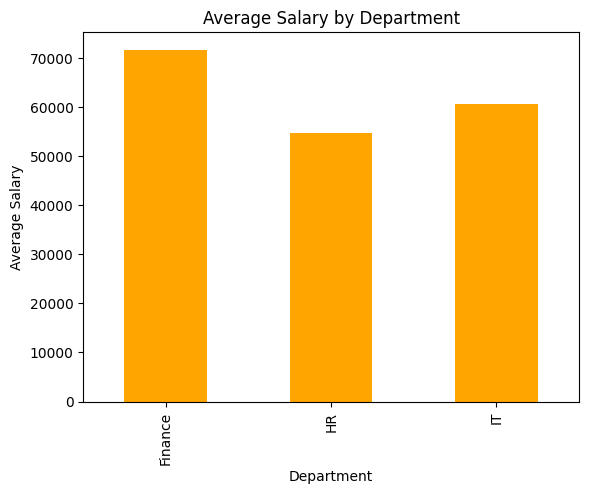

In [22]:
# Department-wise Average Salary Bar Plot
dept_salary = df.groupby('Department')['Salary'].mean()
dept_salary.plot(kind='bar', color='orange', title='Average Salary by Department')
plt.ylabel('Average Salary')
plt.show()

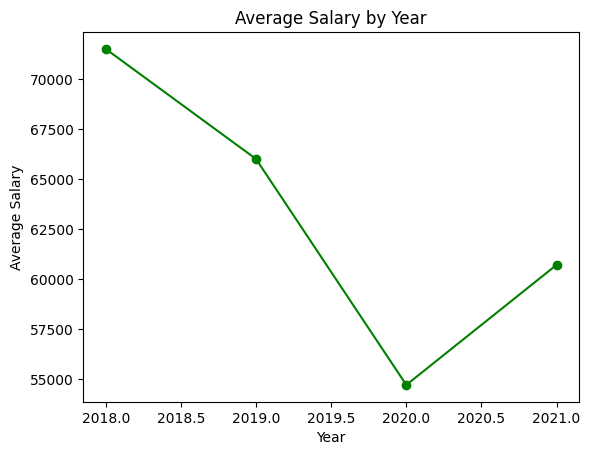

In [23]:
# Salary Trend Over Joining Year
year_salary = df.groupby('Year')['Salary'].mean()
year_salary.plot(kind='line', marker='o', color='green', title='Average Salary by Year')
plt.ylabel('Average Salary')
plt.show()